# Unsupervised Algorithms in Machine Learning - Final Project
## Credit Card data clustering using K-Means 

This analysis aims to cluster customers by examining credit card data based on several features. The data is publicly available in  https://www.kaggle.com/datasets/arjunbhasin2013/ccdata . Below is what we know about the dataset:

* CUSTID : Identification of Credit Card holder
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

### Exploratory Data Analysis

In [100]:
# Read Data
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Looking at the correlation matrix, we can see that there are lots of features that are correlated with each other.

<AxesSubplot:>

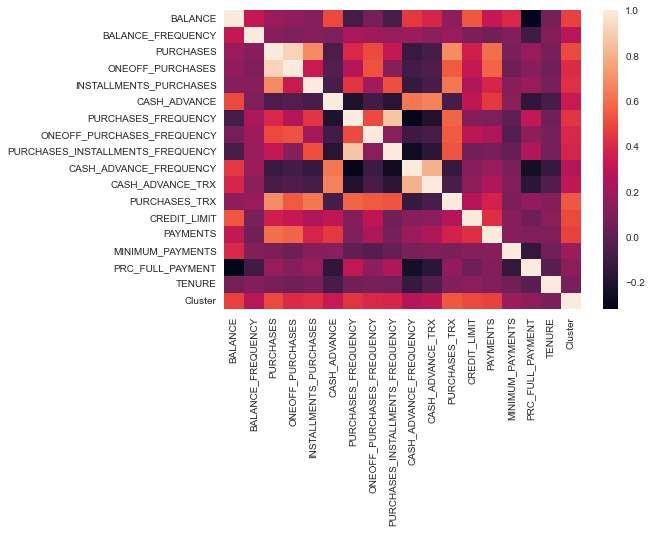

In [70]:
cor_matrix = pd.DataFrame(df.corr())
sb.heatmap(cor_matrix ,xticklabels=True, yticklabels=True)

#### Missing Values and Imputation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Impute mean for the missing values
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(value = df['CREDIT_LIMIT'].mean()).values
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(value = df['MINIMUM_PAYMENTS'].mean()).values

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df = df.drop(['CUST_ID'], axis=1)

### Scaling and Dimensionality Reduction

In [9]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df),columns= df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [91]:
pca = PCA(n_components = 2)
df_PCA = pd.DataFrame(pca.fit_transform(df_scaled), columns=(["PCA 1","PCA 2"]))
df_PCA.head()

,PCA 1,PCA 2
0,-1.682222,-1.076450
1,-1.138301,2.506476
2,0.969684,-0.383529
3,-0.873630,0.043170
4,-1.599434,-0.688581


### Model Training and Evaluation

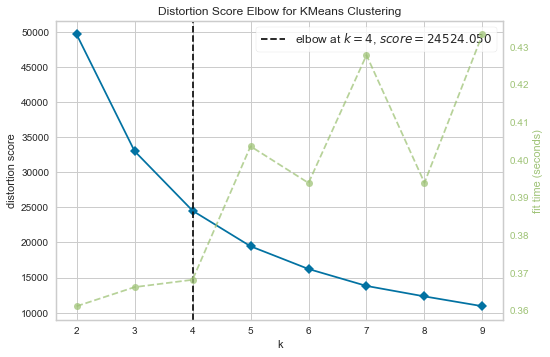

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_PCA)
visualizer.show()

In [20]:
k_means = KMeans(init = "k-means++", n_clusters = 4)
k_means.fit(df_PCA)

KMeans(n_clusters=4)

In [94]:
df_PCA["Cluster"] = k_means.labels_

In [95]:
df_PCA.head()

,PCA 1,PCA 2,Cluster
0,-1.682222,-1.076450,0
1,-1.138301,2.506476,2
2,0.969684,-0.383529,1
3,-0.873630,0.043170,0
4,-1.599434,-0.688581,0


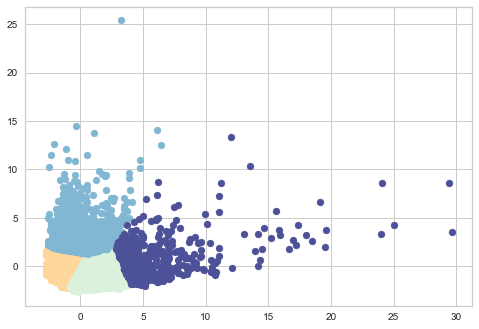

In [58]:
cluster_0 = df_PCA[df_PCA['Cluster'] == 0]
cluster_1 = df_PCA[df_PCA['Cluster'] == 1]
cluster_2 = df_PCA[df_PCA['Cluster'] == 2]
cluster_3 = df_PCA[df_PCA['Cluster'] == 3]
plt.scatter(cluster_0['PCA 1'], cluster_0['PCA 2'], color = '#ffd79d')
plt.scatter(cluster_1['PCA 1'], cluster_1['PCA 2'], color = '#daf2dc')
plt.scatter(cluster_2['PCA 1'], cluster_2['PCA 2'], color = '#81b7d2')
plt.scatter(cluster_3['PCA 1'], cluster_3['PCA 2'], color = '#4d5198')

In [62]:
df["Cluster"] = k_means.labels_

In [63]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


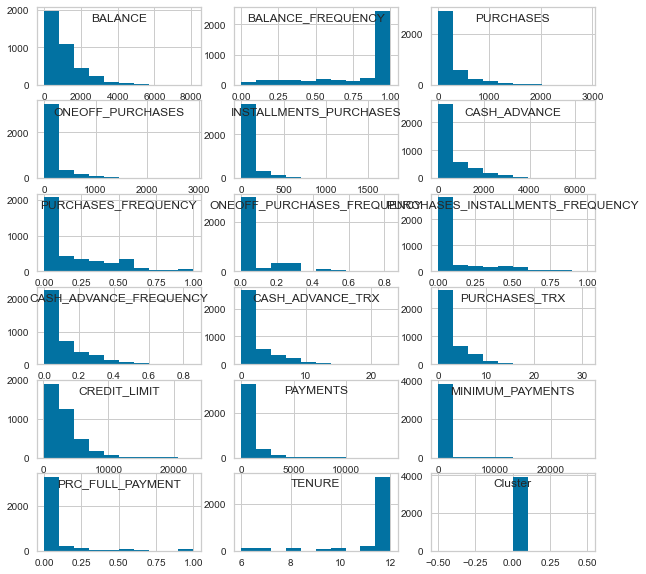

In [65]:
df_0 = df[df['Cluster'] == 0]

ncols = 3
nrows = int(np.ceil(len(df_0.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]

        if counter < len(df_0.columns):
            ax.hist(df_0[df_0.columns[counter]], label='{}'.format(df_0.columns[counter]))
            ax.set_title(df_0.columns[counter],x=0.5, y=0.75)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()

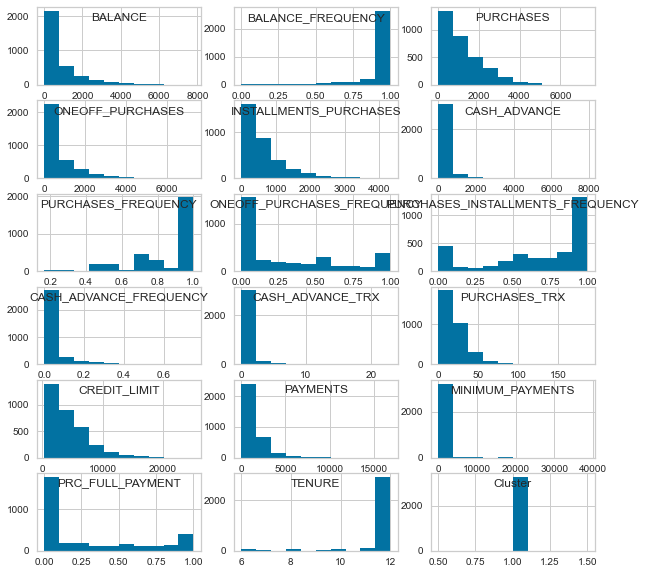

In [67]:
df_1 = df[df['Cluster'] == 1]

ncols = 3
nrows = int(np.ceil(len(df_1.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]

        if counter < len(df_1.columns):
            ax.hist(df_1[df_1.columns[counter]], label='{}'.format(df_1.columns[counter]))
            ax.set_title(df_1.columns[counter],x=0.5, y=0.75)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()

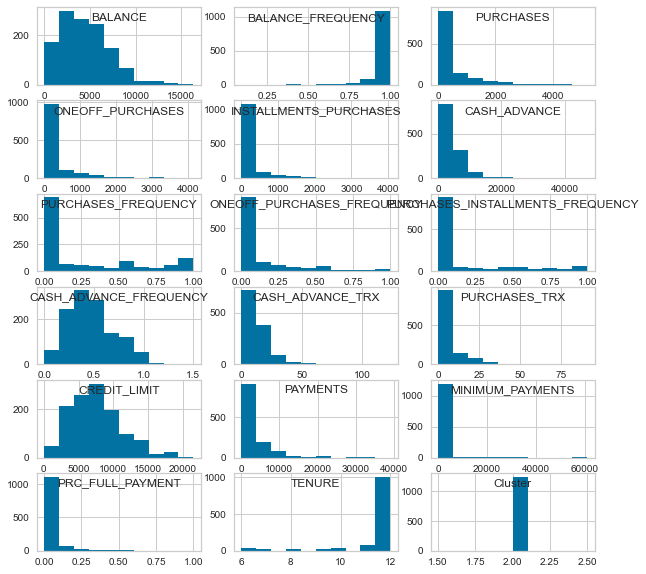

In [68]:
df_2 = df[df['Cluster'] == 2]

ncols = 3
nrows = int(np.ceil(len(df_2.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]

        if counter < len(df_2.columns):
            ax.hist(df_2[df_2.columns[counter]], label='{}'.format(df_2.columns[counter]))
            ax.set_title(df_2.columns[counter],x=0.5, y=0.75)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()

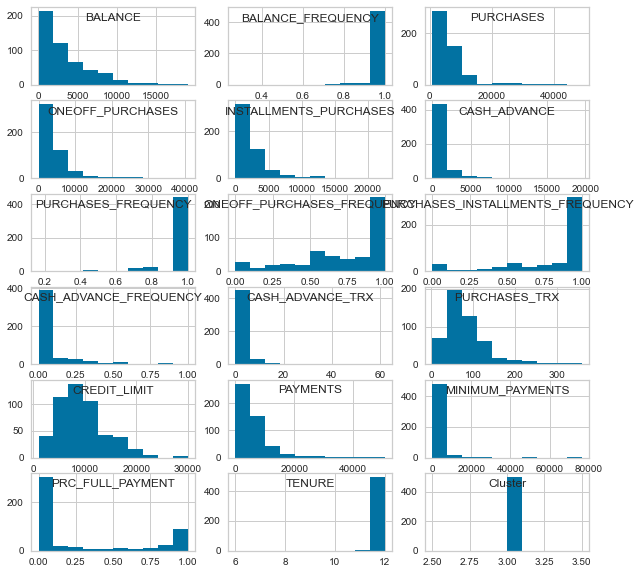

In [69]:
df_3 = df[df['Cluster'] == 3]

ncols = 3
nrows = int(np.ceil(len(df_3.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]

        if counter < len(df_3.columns):
            ax.hist(df_3[df_3.columns[counter]], label='{}'.format(df_3.columns[counter]))
            ax.set_title(df_3.columns[counter],x=0.5, y=0.75)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()

### Conclusion

By using the elbow method we have identified 4 optimal k clusters to perm Kmeans clustering algorithm to out data. we have also reduced the dimensions using PCA to 2 dimensions to improve the algorithm. Below are the clusters and their characteristics based from observation of their histograms.

**Cluster 1 - Low Users** <br>
 `low balance`- `low purchases` - `low credit limit` <br>
 These are the customers who does not always actively use their credit card. They also has low purchases apparently because they have low credit limit.

**Cluster 2 - Moderate Users** <br>
`low balance`-`medium puchases`-`high installment occurence`-`low credit limit` <br>
We can call these customers as medium users where there is only frequent purchases mostly using installment option, but they also with low credit limit.

**Cluster 3 - Heavy Users** <br>
`high balance`-`high credit limit`-`high cash advance`-`low purchases` <br>
These are the heavy users which relative have high balances, though they have also high credit limits. It is noticable that they have low purchases meaning that they purchases high valued products.

**Cluster 4 - Smart Users <br>**
`low balance`-`high credit limit`-`high purchases trx` <br>
These are what we can call as smart users where they maintain low balance though they have high credit limit. So they typically pay whatever they bought on time and full.